In [19]:
import pandas as pd
import numpy as np

In [20]:
dfFeatures = pd.read_csv('processed_results_2.1.csv')
dfFeatures.head()

,voiceID,duration,meanF0Hz,stdevF0Hz,HNR,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,...,f4_median,JitterPCA,ShimmerPCA,pF,fdisp,avgFormant,mff,fitch_vtl,delta_f,vtl_delta_f
0,../audio/common_voice_en_19721473.mp3,3.658958,197.900264,36.011095,12.566395,0.014459,0.000074,0.007554,0.007762,0.022662,...,2891.063764,-2.093687,0.229653,NaN,807.153529,1663.325883,1365.104317,20.550304,825.206255,21.206819
1,../audio/common_voice_en_19065733.mp3,4.512229,205.211739,38.502619,11.249075,0.019145,0.000093,0.008074,0.008431,0.024221,...,3191.527166,-0.686959,-0.118547,NaN,911.114641,1936.694616,1566.146510,17.980653,946.682492,18.485606
2,../audio/common_voice_en_19974678.mp3,3.296208,189.000448,22.400259,17.301504,0.010255,0.000054,0.004380,0.003826,0.013139,...,2683.245177,-4.251508,-0.170616,NaN,728.659960,1535.873277,1294.181109,21.804655,755.706026,23.157153
3,../audio/common_voice_en_19451222.mp3,6.165687,234.131949,21.266128,13.544640,0.015492,0.000066,0.007941,0.008324,0.023824,...,3444.739589,-0.963093,-0.429421,NaN,987.118355,1888.490155,1485.711247,18.915206,959.544500,18.237820
4,../audio/common_voice_en_20080907.mp3,2.410792,128.544888,15.573467,13.774125,0.015149,0.000118,0.006356,0.006914,0.019069,...,2727.770044,-0.149377,-1.664218,NaN,791.557785,1574.394636,1235.260242,22.707236,788.993745,22.180151


In [21]:
dfFeatures['voiceID'] = dfFeatures['voiceID'].str.lstrip('../audio/')

In [22]:
dfFeatures.head()

,voiceID,duration,meanF0Hz,stdevF0Hz,HNR,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,...,f4_median,JitterPCA,ShimmerPCA,pF,fdisp,avgFormant,mff,fitch_vtl,delta_f,vtl_delta_f
0,common_voice_en_19721473.mp3,3.658958,197.900264,36.011095,12.566395,0.014459,0.000074,0.007554,0.007762,0.022662,...,2891.063764,-2.093687,0.229653,NaN,807.153529,1663.325883,1365.104317,20.550304,825.206255,21.206819
1,common_voice_en_19065733.mp3,4.512229,205.211739,38.502619,11.249075,0.019145,0.000093,0.008074,0.008431,0.024221,...,3191.527166,-0.686959,-0.118547,NaN,911.114641,1936.694616,1566.146510,17.980653,946.682492,18.485606
2,common_voice_en_19974678.mp3,3.296208,189.000448,22.400259,17.301504,0.010255,0.000054,0.004380,0.003826,0.013139,...,2683.245177,-4.251508,-0.170616,NaN,728.659960,1535.873277,1294.181109,21.804655,755.706026,23.157153
3,common_voice_en_19451222.mp3,6.165687,234.131949,21.266128,13.544640,0.015492,0.000066,0.007941,0.008324,0.023824,...,3444.739589,-0.963093,-0.429421,NaN,987.118355,1888.490155,1485.711247,18.915206,959.544500,18.237820
4,common_voice_en_20080907.mp3,2.410792,128.544888,15.573467,13.774125,0.015149,0.000118,0.006356,0.006914,0.019069,...,2727.770044,-0.149377,-1.664218,NaN,791.557785,1574.394636,1235.260242,22.707236,788.993745,22.180151


In [23]:
dfLabel = pd.read_csv('filtered_data_labeled.tsv', sep='\t')
dfLabel.head()

,client_id,path,sentence,up_votes,down_votes,age,gender,accent,label
0,5001d9a0d3f8f5aae6f386f70713b2d5d046edc7ba0068...,common_voice_en_19687170.mp3,He associated with the Formists.,2,1,fifties,female,us,3
1,5001d9a0d3f8f5aae6f386f70713b2d5d046edc7ba0068...,common_voice_en_19687171.mp3,"The ""ultra accelerator"" injection gives Derric...",2,1,fifties,female,us,3
2,5001d9a0d3f8f5aae6f386f70713b2d5d046edc7ba0068...,common_voice_en_19687172.mp3,"Despite running as a joke, candidates have won...",2,0,fifties,female,us,3
3,5001d9a0d3f8f5aae6f386f70713b2d5d046edc7ba0068...,common_voice_en_19687173.mp3,Stoner also guest-starred in the television dr...,2,0,fifties,female,us,3
4,5001d9a0d3f8f5aae6f386f70713b2d5d046edc7ba0068...,common_voice_en_19687174.mp3,Rainelle was named for the Raine family.,2,0,fifties,female,us,3


In [24]:
dfLabel['age'].unique()

array(['fifties', 'twenties'], dtype=object)

In [25]:
# Merge the two data frames on the condition that dfFeatures['voiceID'] == dfLabel['path']
df = pd.merge(dfFeatures, dfLabel[['path', 'age', 'gender']], left_on='voiceID', right_on='path', how='inner')

# Drop the 'path' column if it's no longer needed
df = df.drop(columns=['path'])

# Display the merged data frame
df.head()

,voiceID,duration,meanF0Hz,stdevF0Hz,HNR,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,...,ShimmerPCA,pF,fdisp,avgFormant,mff,fitch_vtl,delta_f,vtl_delta_f,age,gender
0,common_voice_en_19721473.mp3,3.658958,197.900264,36.011095,12.566395,0.014459,0.000074,0.007554,0.007762,0.022662,...,0.229653,NaN,807.153529,1663.325883,1365.104317,20.550304,825.206255,21.206819,twenties,female
1,common_voice_en_19065733.mp3,4.512229,205.211739,38.502619,11.249075,0.019145,0.000093,0.008074,0.008431,0.024221,...,-0.118547,NaN,911.114641,1936.694616,1566.146510,17.980653,946.682492,18.485606,fifties,female
2,common_voice_en_19974678.mp3,3.296208,189.000448,22.400259,17.301504,0.010255,0.000054,0.004380,0.003826,0.013139,...,-0.170616,NaN,728.659960,1535.873277,1294.181109,21.804655,755.706026,23.157153,twenties,female
3,common_voice_en_19451222.mp3,6.165687,234.131949,21.266128,13.544640,0.015492,0.000066,0.007941,0.008324,0.023824,...,-0.429421,NaN,987.118355,1888.490155,1485.711247,18.915206,959.544500,18.237820,twenties,female
4,common_voice_en_20080907.mp3,2.410792,128.544888,15.573467,13.774125,0.015149,0.000118,0.006356,0.006914,0.019069,...,-1.664218,NaN,791.557785,1574.394636,1235.260242,22.707236,788.993745,22.180151,fifties,male


In [ ]:
import matplotlib.pyplot as plt

# List of features to plot
features = [col for col in df.columns if col not in ['voiceID', 'age', 'gender']]

# Create histograms for each feature
for feature in features:
    plt.figure(figsize=(8, 5))
    plt.hist(df[df['age'] == 'fifties'][feature], bins=30, color='green', alpha=0.7, label='Fifties')
    plt.hist(df[df['age'] == 'twenties'][feature], bins=30, color='blue', alpha=0.7, label='Twenties')
    plt.title(f'Histogram of {feature} by Age')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(axis='y', alpha=0.75)
    plt.show()

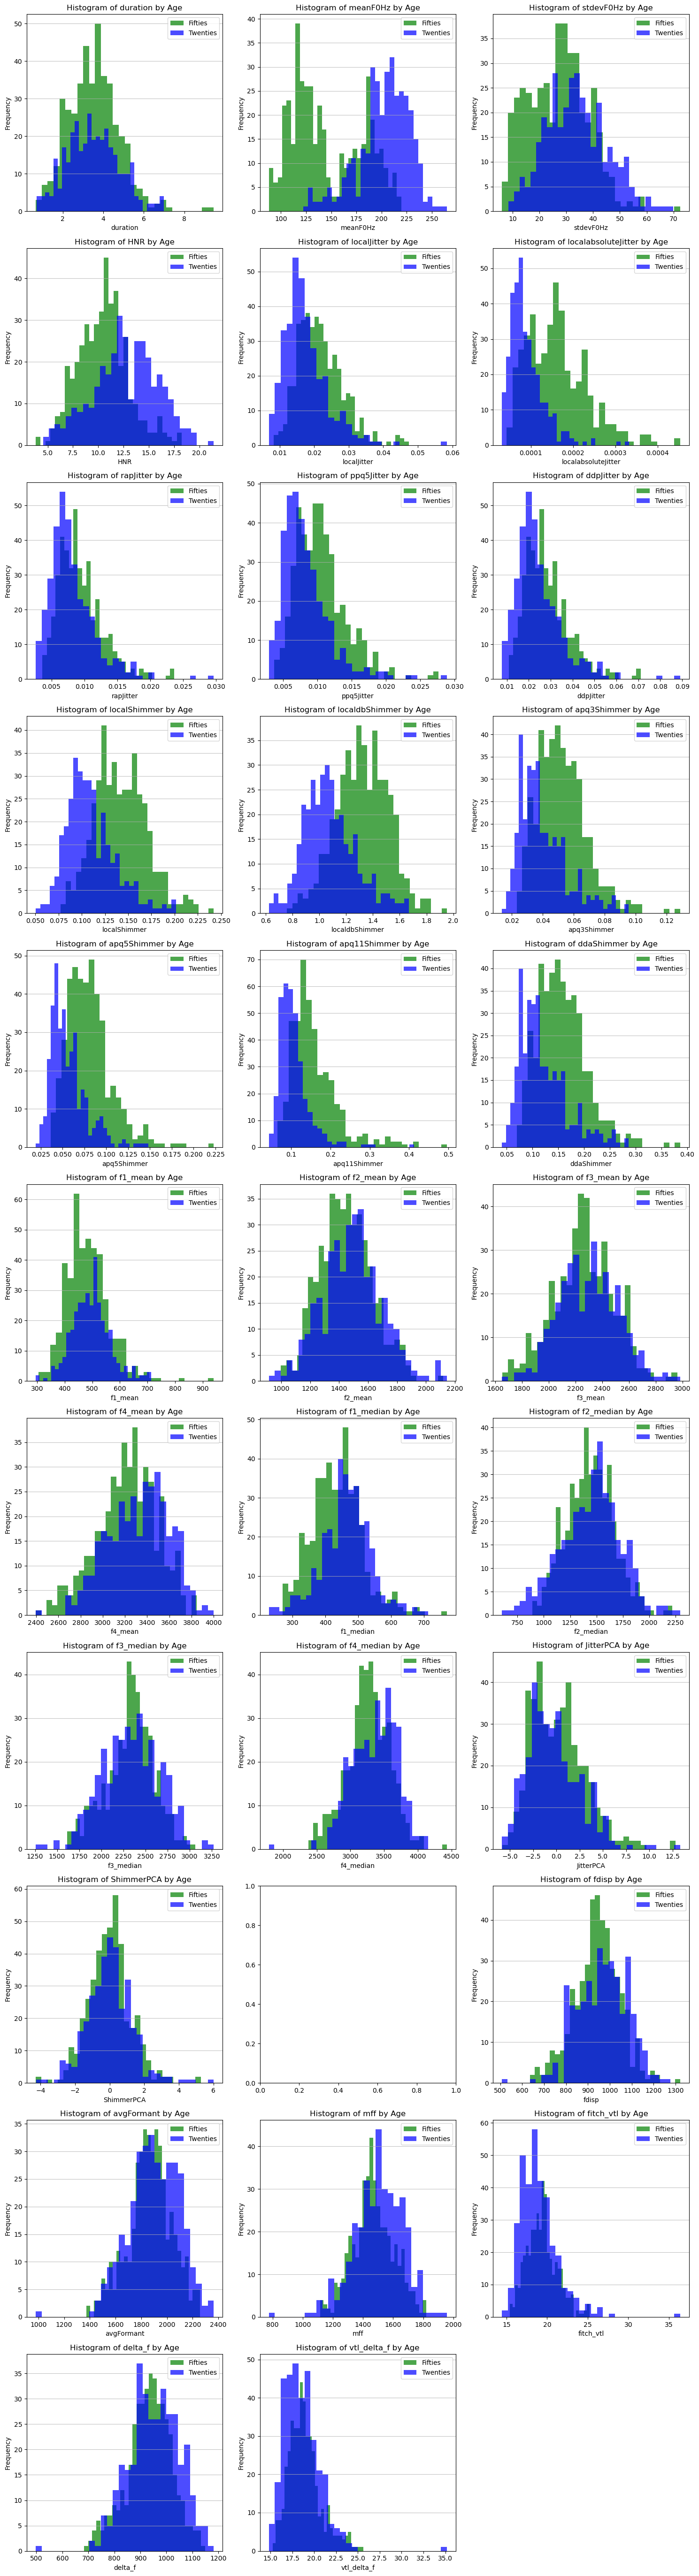

In [31]:
# Number of rows and columns for subplots
ncols = 3
nrows = (num_features + ncols - 1) // ncols  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each feature in a separate subplot
for i, feature in enumerate(features):
    try:
        ax = axes[i]
        ax.hist(df[df['age'] == 'fifties'][feature], bins=30, color='green', alpha=0.7, label='Fifties')
        ax.hist(df[df['age'] == 'twenties'][feature], bins=30, color='blue', alpha=0.7, label='Twenties')
        ax.set_title(f'Histogram of {feature} by Age')
        ax.set_xlabel(feature)
        ax.set_ylabel('Frequency')
        ax.legend()
        ax.grid(axis='y', alpha=0.75)
    except:
        continue
    
# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

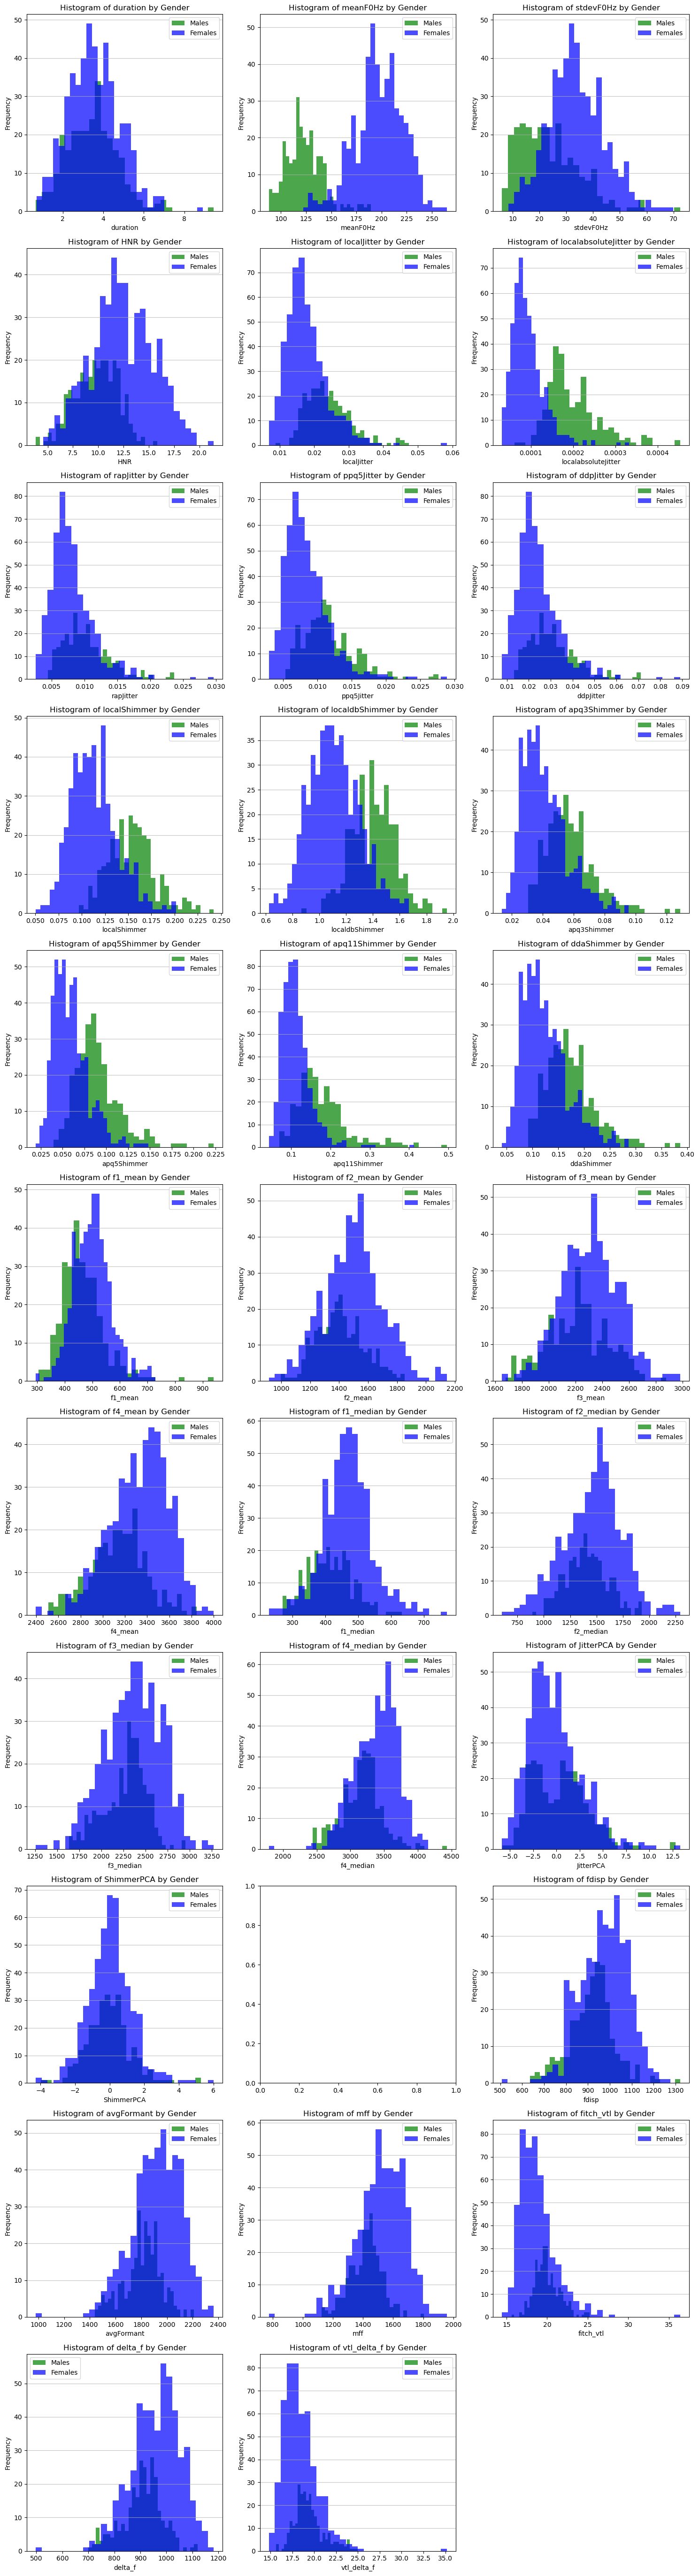

In [32]:
# Number of rows and columns for subplots
ncols = 3
nrows = (num_features + ncols - 1) // ncols  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each feature in a separate subplot
for i, feature in enumerate(features):
    try:
        ax = axes[i]
        ax.hist(df[df['gender'] == 'male'][feature], bins=30, color='green', alpha=0.7, label='Males')
        ax.hist(df[df['gender'] == 'female'][feature], bins=30, color='blue', alpha=0.7, label='Females')
        ax.set_title(f'Histogram of {feature} by Gender')
        ax.set_xlabel(feature)
        ax.set_ylabel('Frequency')
        ax.legend()
        ax.grid(axis='y', alpha=0.75)
    except:
        continue
    
# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()